# K-Nearest Neighbors(KNN)

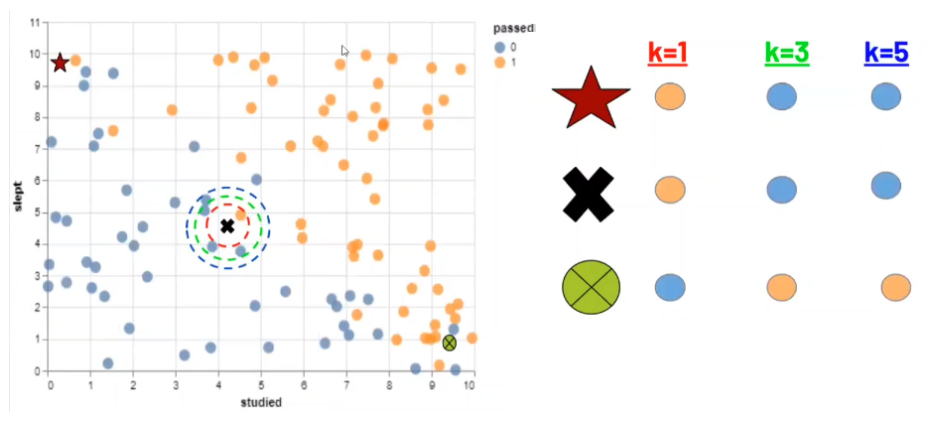

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [52]:
df = pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# EDA

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


In [55]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

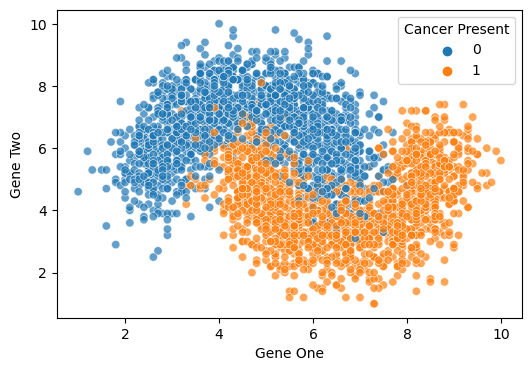

In [56]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

(4.0, 8.0)

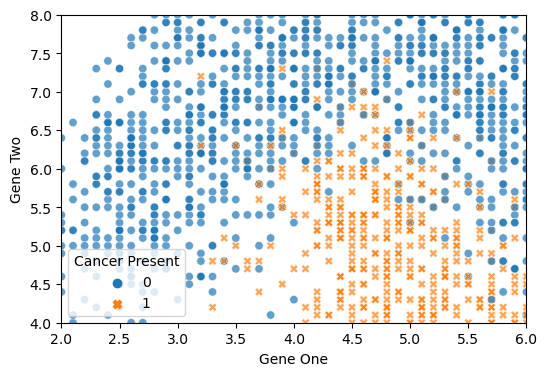

In [57]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

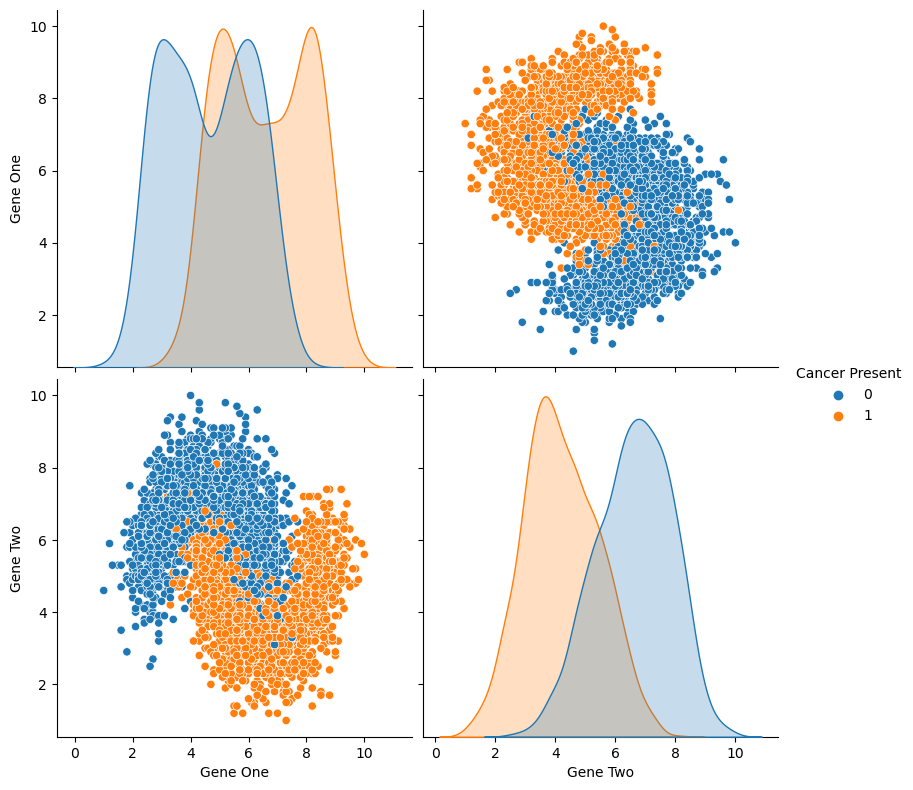

In [58]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1);

In [ ]:
# 

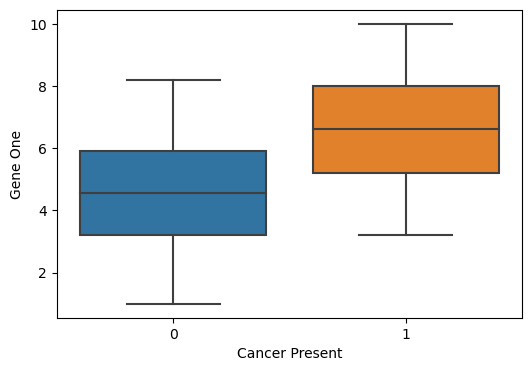

In [59]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df);

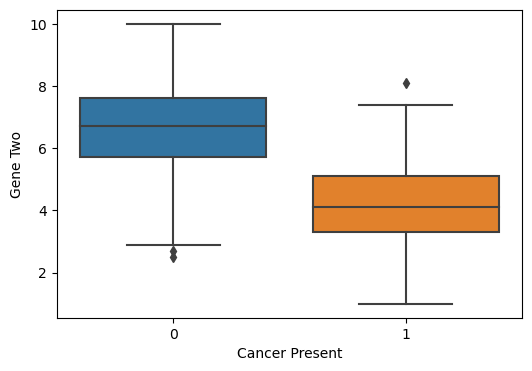

In [60]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df);

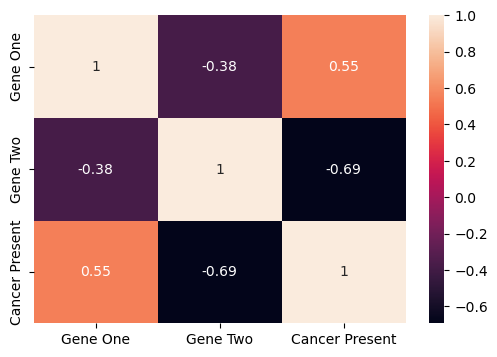

In [61]:
sns.heatmap(df.corr(), annot=True);

In [62]:
%matplotlib inline

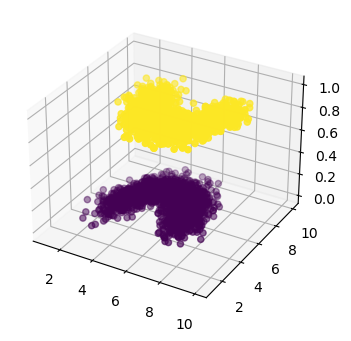

In [63]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

# Train|Test Split and Scaling Data

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

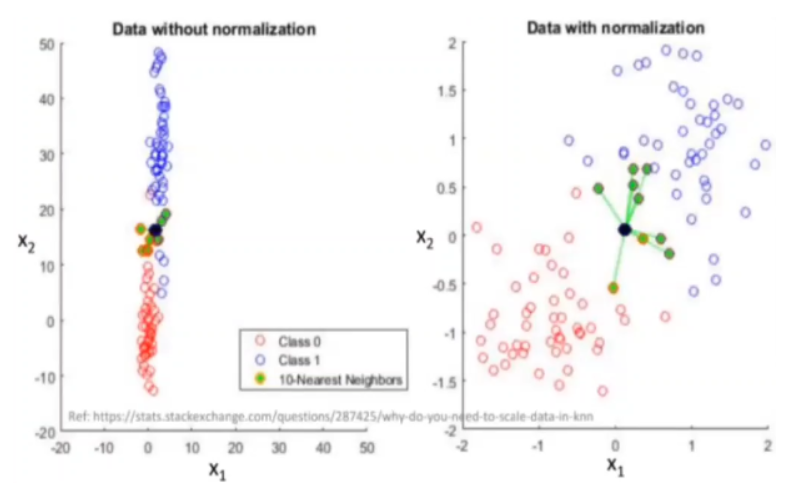

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train) # tranin data ya  fit transform
X_test_scaled = scaler.transform(X_test)

# Modeling

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=5) #default değer 5, k=5 ,k değerini burada veriyoruz

In [71]:
knn_model.fit(X_train_scaled,y_train) # eğittik

KNeighborsClassifier()

In [72]:
y_pred = knn_model.predict(X_test_scaled)#tahmin aldık
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [73]:
y_pred_proba = knn_model.predict_proba(X_test_scaled) # bu modelde  olasılıklar   vardı bu kodlar  sadece  derss için

In [74]:
pd.DataFrame(y_pred_proba)# k değerini 

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


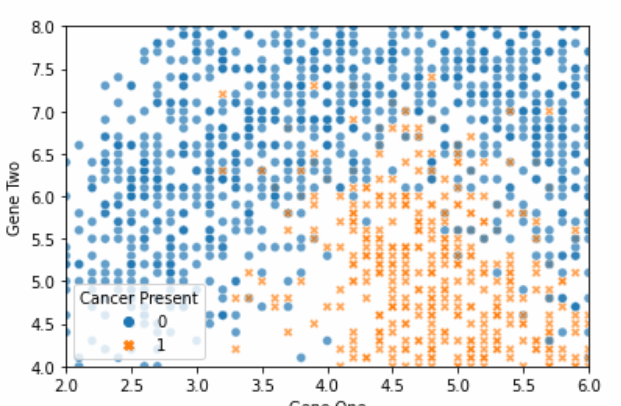

In [75]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [76]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
1502,0,0,0.0,1.0
2930,0,0,0.0,1.0
1904,0,0,0.2,0.8
1839,0,0,0.0,1.0
177,1,1,0.8,0.2
2525,1,1,1.0,0.0
945,0,0,0.0,1.0
2851,1,1,1.0,0.0
2067,0,0,0.0,1.0
680,1,1,1.0,0.0


# Model Performance on Classification Tasks

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix # burada  version  hatası olabilir

In [78]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

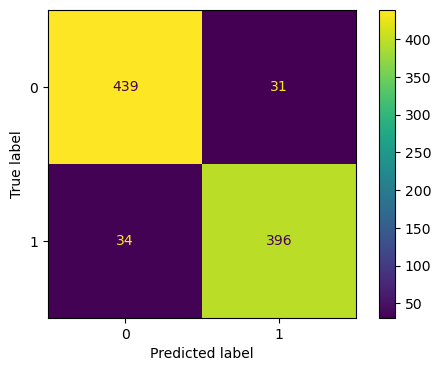

In [79]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



# Elbow Method for Choosing Reasonable K Values

In [81]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
# k değerimizi  en optimum nasıl seçeriz
# bir yerde  hyper  parameter  var ise  mutlaka onun ince ayarı ile ilgil metodlar  vardır

In [82]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test) #  burası üzerinde   k yı eceriz
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

Text(0, 0.5, 'Error Rate')

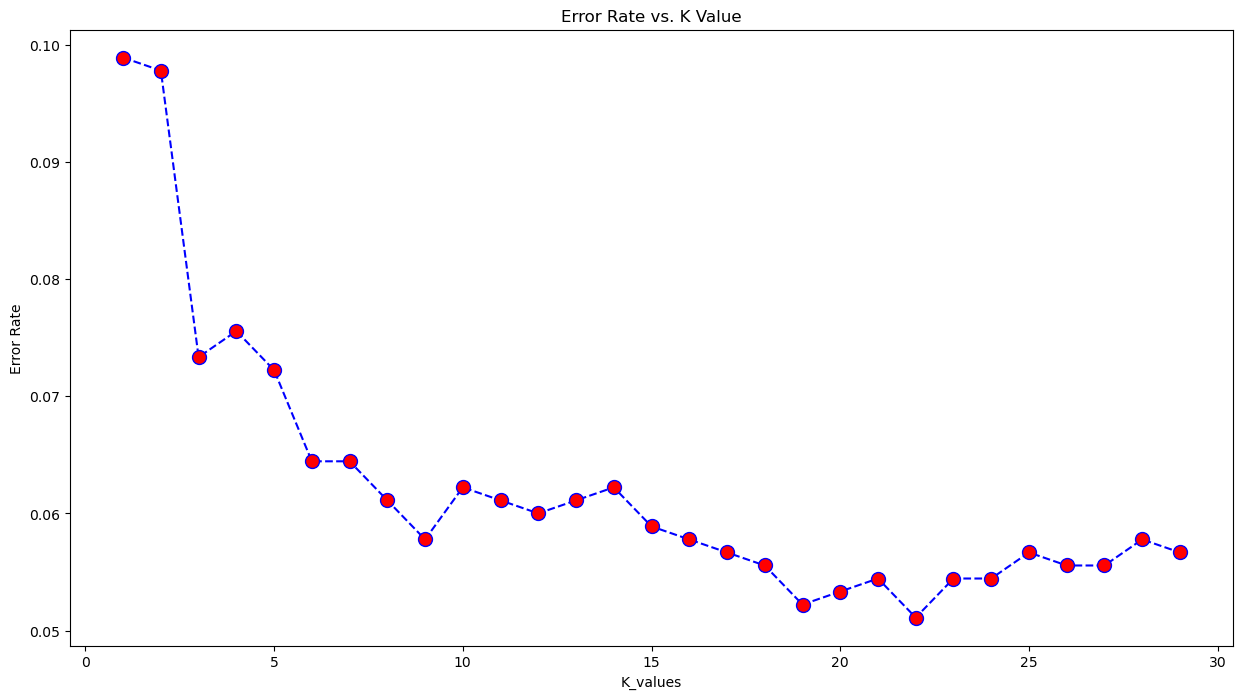

In [83]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')


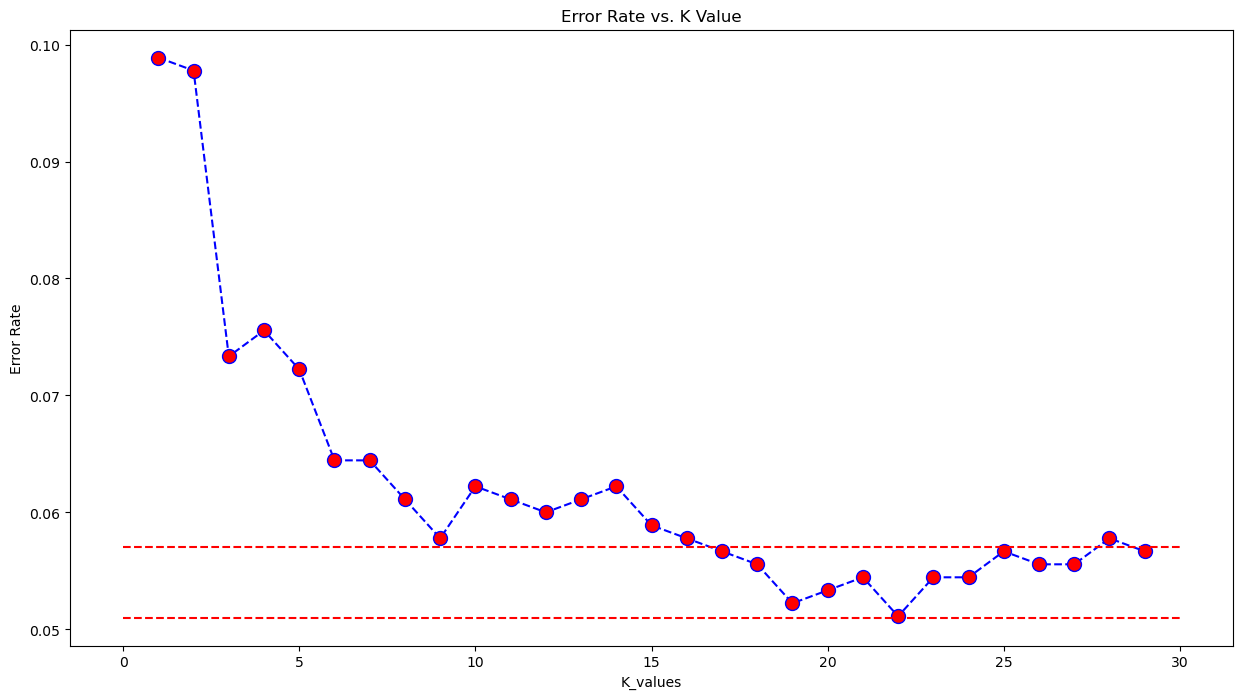

In [84]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

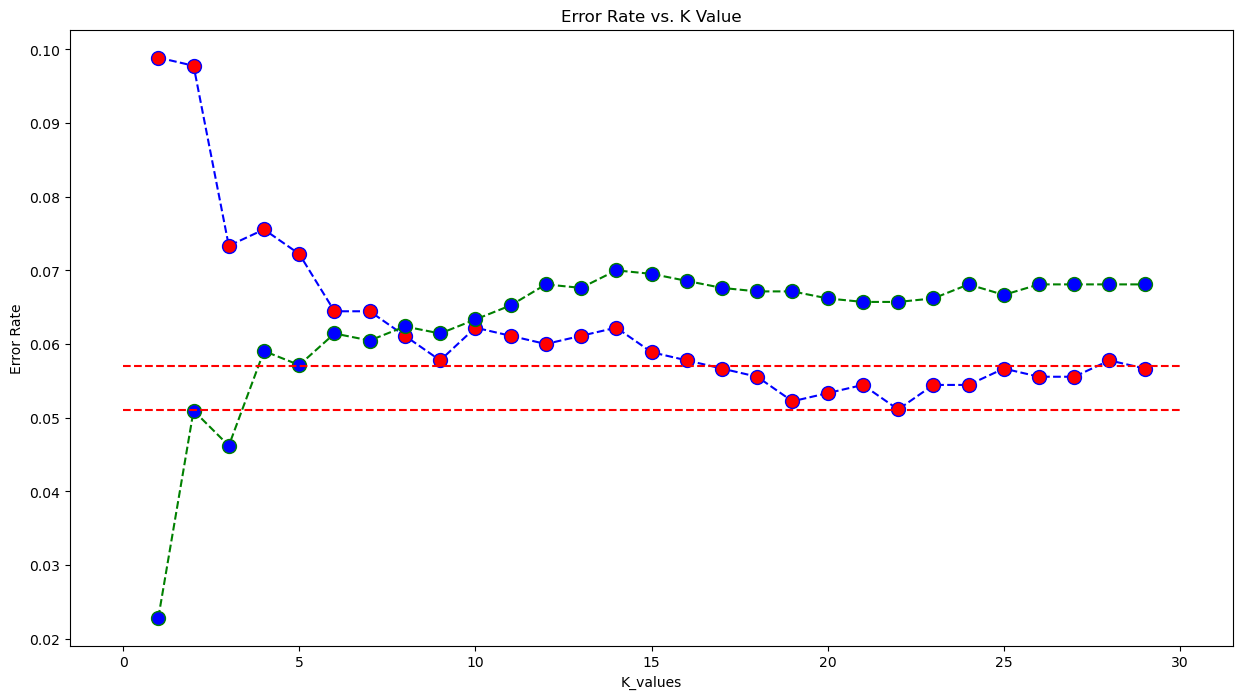

In [85]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

In [ ]:
#  açıklı ta   overfitting   vardır

## Scores by Various K Values

In [86]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# bunu heryerde  kullancağız  eval metrik

In [87]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [88]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [89]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_scaled,y_train)
print('WITH K=21\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [90]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_scaled,y_train)
print('WITH K=19\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=19

Test_Set

[[448  22]
 [ 25 405]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       470
           1       0.95      0.94      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 959   71]
 [  70 1000]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [91]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## CV

In [92]:
from sklearn.model_selection import cross_val_score, cross_validate

In [93]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.122782,0.012185,0.923810,0.933333,0.915888,0.924528
2,0.001931,0.009480,0.947619,0.944444,0.953271,0.948837
3,0.002995,0.005603,0.947619,0.970588,0.925234,0.947368
4,0.000991,0.008543,0.866667,0.876190,0.859813,0.867925
5,0.003996,0.011669,0.923810,0.909910,0.943925,0.926606
6,0.001005,0.005601,0.919048,0.924528,0.915888,0.920188
7,0.002014,0.005716,0.942857,0.927928,0.962617,0.944954
8,0.001081,0.006022,0.938095,0.927273,0.953271,0.940092
9,0.001512,0.008050,0.961905,0.980583,0.943925,0.961905
10,0.002597,0.008064,0.890476,0.868421,0.925234,0.895928


In [94]:
df_scores.mean()[2:]

test_accuracy     0.926190
test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
dtype: float64

## Predict New Observation

In [95]:
new_observation = [[3.5, 4.3]] # scale olmadan yeni tahmin değeri 1 + CA (kanser) çıktı. gözlem oluşturduk

In [96]:
knn_model.predict(new_observation) # tahmin ettik

array([1], dtype=int64)

In [97]:
knn_model.predict_proba(new_observation) # scale yaparak yeni tahmin değeri 0 CA (-) negatif(kanser) çıktı.

array([[0.34482759, 0.65517241]])

In [98]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [99]:
knn_model.predict(new_observation_scaled) # bu kez model    0 verdi   kanser değil dedi.

array([0], dtype=int64)

## Gridsearch Method for Choosing Reasonable K Values

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
knn_grid = KNeighborsClassifier()

In [103]:
k_values = range(1,30)

In [104]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
# burada   n_neighbors : hyper parametre 
# 1:öklit 
# 2:manathan
# uniform  uzak arkadas  yakın arakdaş ayırmdan hepsini  aynı  mesfeye koyrarakk en cok hangis is eona göre   seğre verir
# distance her bir  gözleme bakarak  mesafeyea ağırlıklı değer veriyor, yakına çok  uzağa za veriyor, 
# aynı gözlem  ağırlıkları toplayıp  hangisi çoksa  ona  göre   deger veriyor; arkadaşlar arasında yakın uzak olanı   seçerek 
# değer veriyor.
# k value  alırker  değerler vereceğiz  en uygununu getircek

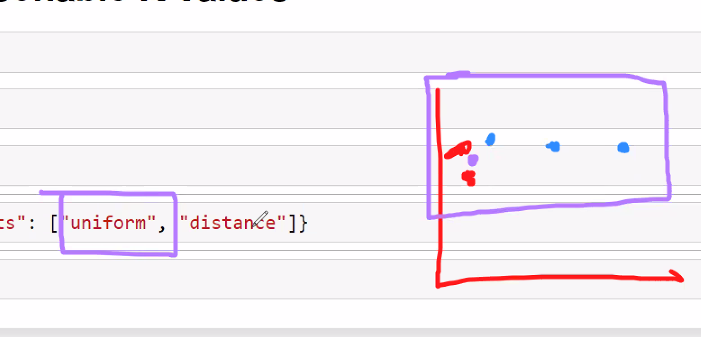

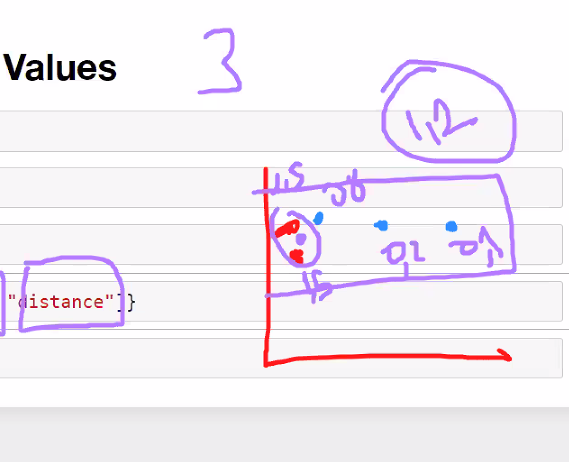

In [105]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')  # modeli  kurduk
# data  balance   ise  accuracy
# data unbalance ise  f1  recall  a bakılır hedef klaslarımız eşit ise

In [106]:
knn_grid_model.fit(X_train_scaled,y_train) # eğittik

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [107]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

In [108]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [110]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

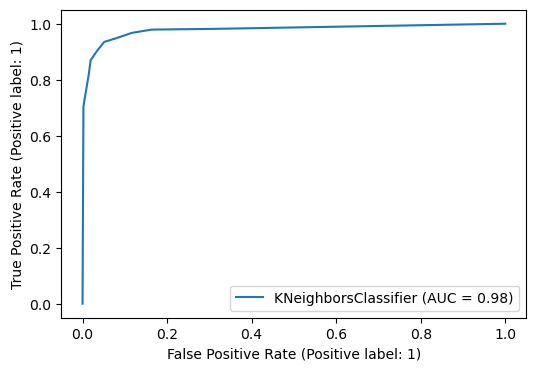

In [112]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [113]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

In [114]:
knn_grid_model = KNeighborsClassifier(n_neighbors=21).fit(X_train_scaled, y_train)

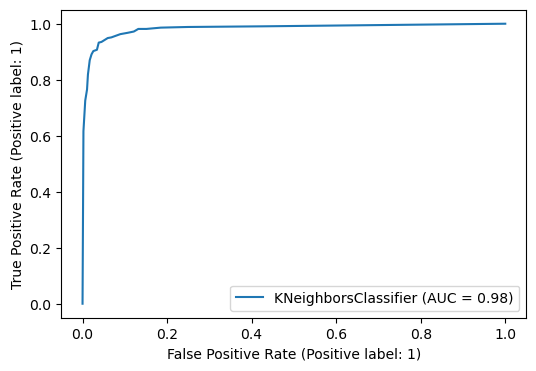

In [115]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test)

In [116]:
y_pred_proba_grid = knn_grid_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba_grid[:,1])

0.9826669965363682

## Final Model and Model Deployment¶

In [119]:
import pickle

In [120]:
scaler = StandardScaler()

In [121]:
scaler.fit(X)

StandardScaler()

In [122]:
X_scaled = scaler.transform(X)

final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled,y)

pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

## Predict

In [123]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [124]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [125]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [126]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [127]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


## Pipline Autorise  otomatikleştirme

In [128]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]# bu sırada verilmeli  sırası çok önemli pozitional argümandır
# buraya  1. sıra  fit  trandform yapılabilen herşeyi  verebilriz
#         2. sıra  fit predict olarak çalı
# sadece  bir mmodel  verliyor  fazlası olamaz

Pipeline(steps=operations)
# bu 

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [129]:
pipe_model = Pipeline(steps=operations)

In [130]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [131]:
y_pred = pipe_model.predict(X_test)
y_pred


array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [132]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

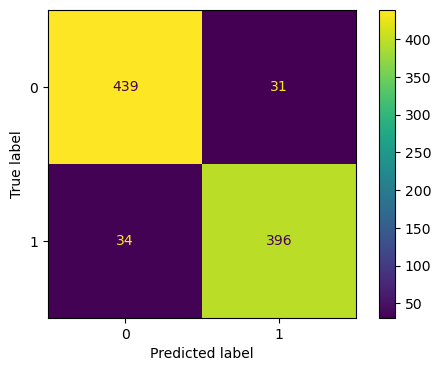

In [133]:
plot_confusion_matrix(pipe_model,X_test, y_test);

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [ ]:
# paramsları neler

In [135]:
pipe_model.get_params() # içindekini raporluyor

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [137]:
pipe_model.set_params(knn__n_neighbors = 9) # içine verirken yukarıdaki isimleri aynen vermeliyiz

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [138]:
pipe_model["scaler"]

StandardScaler()

In [139]:
pipe_model["knn"]

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline(steps=operations)

In [143]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv = 10, scoring= 'f1')

In [145]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [146]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

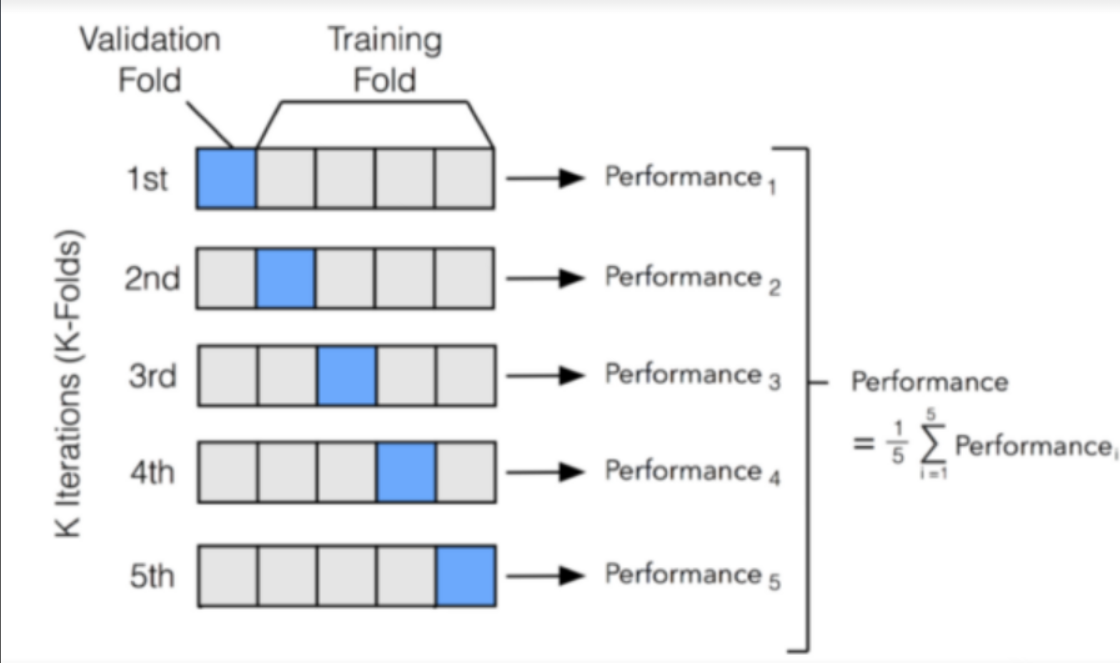

In [147]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.925515
test_recall       0.930841
test_f1           0.927874
test_accuracy     0.926190
dtype: float64

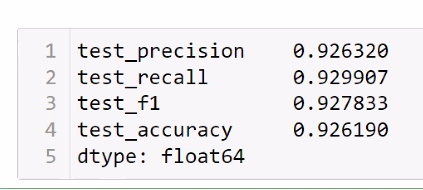

## Fİnal pipe_model

In [153]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]


In [154]:
pipe_final = Pipeline(operations)

In [159]:
predictions = pipe_final.predict(samples)
predictions

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Predict New Observations with pipe_model

In [157]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [158]:
predictions = pipe_final.predict(samples)
predictions

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [156]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
## bitti